In [106]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [7]:
# date parsers for datetime columns
d_parser = lambda x: datetime.strptime (x, "%Y%m%d")

# Cleaning up some data

Here I am going through the files we have available, looking at the data, how much is there, which columns are useful, dropping those that are unnecessary, organising formats (datetime) etc. 

In [8]:
df_agency = pd.read_csv('/users/aoifesullivan/Desktop/HVV/agency.txt')
df_agency.head(10)
#df_agency seems to be useless for what we want. Can bin it off.

,agency_id,agency_name,agency_url,agency_timezone,agency_lang,agency_phone
0,26,Hamburger Verkehrsverbund (hvv),http://www.hvv.de,Europe/Berlin,de,040/19449
1,32,Hamburger Verkehrsverbund (hvv),http://www.hvv.de,Europe/Berlin,de,040/19449
2,34,Hamburger Verkehrsverbund (hvv),http://www.hvv.de,Europe/Berlin,de,040/19449
3,41,Hamburger Verkehrsverbund (hvv),http://www.hvv.de,Europe/Berlin,de,040/19449
4,61,Hamburger Verkehrsverbund (hvv),http://www.hvv.de,Europe/Berlin,de,040/19449
5,66,Hamburger Verkehrsverbund (hvv),http://www.hvv.de,Europe/Berlin,de,040/19449
6,72,Hamburger Verkehrsverbund (hvv),http://www.hvv.de,Europe/Berlin,de,040/19449
7,73,Hamburger Verkehrsverbund (hvv),http://www.hvv.de,Europe/Berlin,de,040/19449
8,76,Hamburger Verkehrsverbund (hvv),http://www.hvv.de,Europe/Berlin,de,040/19449
9,106,Hamburger Verkehrsverbund (hvv),http://www.hvv.de,Europe/Berlin,de,040/19449


In [60]:
df_agency.agency_id.unique

<bound method Series.unique of 0      26
1      32
2      34
3      41
4      61
5      66
6      72
7      73
8      76
9     106
10    126
11    151
12    311
13    341
14    356
15    358
16    361
17    366
18    371
Name: agency_id, dtype: int64>

In [45]:
df_calendar_dates = pd.read_csv('/users/aoifesullivan/Desktop/HVV/calendar_dates.txt', parse_dates=["date"], date_parser = d_parser)
df_calendar_dates.head(10)

,service_id,date,exception_type
0,1,2022-12-26,2
1,1,2023-04-10,2
2,1,2023-05-01,2
3,1,2023-05-29,2
4,1,2023-10-03,2
5,1,2023-10-31,2
6,1,2023-05-18,2
7,1,2023-04-07,2
8,2,2023-01-02,1
9,2,2023-04-17,1


In [47]:
df_calendar_dates.exception_type.unique()
#looking for more values to try to make sense of exception_type. This didn't make it any clearer to me tbh.

array([2, 1])

In [5]:
df_calendar_dates.dtypes
#just confirming that converting to datetime worked

service_id                 int64
date              datetime64[ns]
exception_type             int64
dtype: object

In [181]:
df_calendar_dates.service_id.unique()
#seeing how many and which services are included in the set, can check that against other tables.

array([   1,    2,    3, ..., 1293, 1294, 1295])

In [52]:
df_calendar = pd.read_csv('/users/aoifesullivan/Desktop/HVV/calendar.txt', parse_dates=["start_date", "end_date"], date_parser = d_parser)
df_calendar.head(10)

,service_id,monday,tuesday,wednesday,thursday,friday,saturday,sunday,start_date,end_date
0,1,1,1,1,1,1,0,0,2022-12-02,2023-12-09
1,2,0,0,0,0,0,0,0,2022-12-02,2023-12-09
2,3,1,1,1,1,1,0,0,2022-12-02,2023-12-09
3,4,1,1,1,1,1,0,0,2022-12-02,2023-12-09
4,5,0,0,0,0,0,0,0,2022-12-02,2023-12-09
5,6,1,1,1,1,1,0,0,2022-12-02,2023-12-09
6,7,1,1,1,1,0,0,0,2022-12-02,2023-12-09
7,8,0,0,0,0,0,0,0,2022-12-02,2023-12-09
8,9,1,0,1,0,1,0,0,2022-12-02,2023-12-09
9,10,1,1,1,1,0,0,0,2022-12-02,2023-12-09


In [53]:
df_calendar.service_id.unique()
#just making sure the same services are covered, they are.

array([   1,    2,    3, ..., 1293, 1294, 1295])

In [43]:
df_frequencies = pd.read_csv('/users/aoifesullivan/Desktop/HVV/frequencies.txt')
df_frequencies.head(10) 

,trip_id,start_time,end_time,headway_secs,exact_times


I guess there's nothing to see here? Original file also shows nothing. Need to investigate that. 


In [44]:
df_routes = pd.read_csv('/users/aoifesullivan/Desktop/HVV/routes.txt')
df_routes.head(10)

,route_id,agency_id,route_short_name,route_long_name,route_type,route_color,route_text_color,route_desc
0,11261_3,356,6193,Itzehoe > Westermoor > Bf. Wrist,3,NaN,NaN,NaN
1,11186_3,356,6192,Brokstedt > Rosdorf > Kellinghusen,3,NaN,NaN,NaN
2,11185_3,356,6191,Hohenwestedt > Rosdorf > Bf. Wrist,3,NaN,NaN,NaN
3,11183_3,356,6182,Kellinghusen> Wrist > Kellinghusen,3,NaN,NaN,NaN
4,11182_3,356,6181,Lohbarbek >Hohenlockstedt,3,NaN,NaN,NaN
5,11181_3,356,6180,Itzehoe > Hohenlockstedt > Wrist,3,NaN,NaN,NaN
6,11310_3,366,6580,Glückstadt > Wewelsfleth > Brokdorf,3,NaN,NaN,NaN
7,11309_3,366,6560,Glückstadt > Kiebitzreihe > Elmshorn,3,NaN,NaN,NaN
8,11308_3,366,6557,Steinburg > Horst > Elmshorn,3,NaN,NaN,NaN
9,11307_3,366,6555,Horst > Kiebitzreihe > Sommerland > Neuenbrook,3,NaN,NaN,NaN


In [61]:
df_routes.agency_id.unique()
#it relates to the agency table, but still think it's useless.

array([356, 366, 358, 341, 126, 106, 311,  41, 361,  32,  26, 151,  72,
        61,  34,  66,  76,  73, 371])

In [41]:
df_routes = df_routes.dropna(axis = 1, how = 'all')
df_routes.head(10)

#dropping columns that have nothing in them

,route_id,agency_id,route_short_name,route_long_name,route_type,route_color,route_text_color
0,11261_3,356,6193,Itzehoe > Westermoor > Bf. Wrist,3,NaN,NaN
1,11186_3,356,6192,Brokstedt > Rosdorf > Kellinghusen,3,NaN,NaN
2,11185_3,356,6191,Hohenwestedt > Rosdorf > Bf. Wrist,3,NaN,NaN
3,11183_3,356,6182,Kellinghusen> Wrist > Kellinghusen,3,NaN,NaN
4,11182_3,356,6181,Lohbarbek >Hohenlockstedt,3,NaN,NaN
5,11181_3,356,6180,Itzehoe > Hohenlockstedt > Wrist,3,NaN,NaN
6,11310_3,366,6580,Glückstadt > Wewelsfleth > Brokdorf,3,NaN,NaN
7,11309_3,366,6560,Glückstadt > Kiebitzreihe > Elmshorn,3,NaN,NaN
8,11308_3,366,6557,Steinburg > Horst > Elmshorn,3,NaN,NaN
9,11307_3,366,6555,Horst > Kiebitzreihe > Sommerland > Neuenbrook,3,NaN,NaN


In [42]:
routes_percent_missing = df_routes.isnull().sum() * 100 / len(df_routes)
routes_percent_missing


route_id             0.000000
agency_id            0.000000
route_short_name     0.000000
route_long_name      2.264601
route_type           0.000000
route_color         99.046484
route_text_color    99.165673
dtype: float64

There are still two useless looking columns so I decided to check what percent of them is actually empty. They are 99% empty so can drop them anyway. 
If I wasn't already trying to do a million things I'd make something for drop na to say if more than x% of the column is empty then drop it. But not really needed!

In [74]:
#so now dropping them all and making df_routes like this now.
df_routes = df_routes.drop(['route_color', 'route_text_color'])
df_routes

,route_id,agency_id,route_short_name,route_long_name,route_type
0,11261_3,356,6193,Itzehoe > Westermoor > Bf. Wrist,3
1,11186_3,356,6192,Brokstedt > Rosdorf > Kellinghusen,3
2,11185_3,356,6191,Hohenwestedt > Rosdorf > Bf. Wrist,3
3,11183_3,356,6182,Kellinghusen> Wrist > Kellinghusen,3
4,11182_3,356,6181,Lohbarbek >Hohenlockstedt,3
...,...,...,...,...,...
834,1259_1200,73,62,Landungsbrücken > Finkenwerder,1200
835,1258_1200,73,61,Landungsbrücken > Neuhof,1200
836,11668_2,371,A3,Elmshorn > Barmstedt > Ulzburg Süd,2
837,11667_2,371,A2,Norderstedt Mitte > Ulzburg Süd > Kaltenkirchen,2


Onto shapes. df_shapes shows the nodes of the route - if we can map it out, then we would get the full route length including road curves.
could use haversine like Kaushik's work, but on this rather than the routes data?
Alternatively I was told about gpd.points_from_xy that turns points into a line and you can map them out. 

In [ ]:
df_shapes = pd.read_csv('/users/aoifesullivan/Desktop/HVV/shapes.txt')
df_shapes.head(10)

In [15]:
df_stop_times = pd.read_csv('/users/aoifesullivan/Desktop/HVV/stop_times.txt', low_memory=False)
df_stop_times.head(10)

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,pickup_type,drop_off_type,stop_headsign
0,32768704,5:35:00,5:35:00,de:01061:46701::3,0,0,0,NaN
1,32768704,5:36:00,5:36:00,de:01061:46672::2,1,0,0,NaN
2,32768704,5:38:00,5:38:00,de:01061:106399::2,2,0,0,NaN
3,32768704,5:40:00,5:40:00,de:01061:46695::1,3,0,0,NaN
4,32768704,5:42:00,5:42:00,de:01061:46675::2,4,0,0,NaN
5,32768704,5:43:00,5:43:00,de:01061:46679::2,5,0,0,NaN
6,32768704,5:45:00,5:45:00,de:01061:13590::2,6,0,0,NaN
7,32768704,5:46:00,5:46:00,de:01061:51632::2,7,0,0,NaN
8,32768704,5:48:00,5:48:00,de:01061:51630::2,8,0,0,NaN
9,32768704,5:49:00,5:49:00,de:01061:51631::2,9,0,0,NaN


In [78]:
stop_times_percent_missing = df_stop_times.isnull().sum() * 100 / len(df_stop_times)
stop_times_percent_missing

trip_id            0.000000
arrival_time       0.000000
departure_time     0.000000
stop_id            0.000000
stop_sequence      0.000000
pickup_type        0.000000
drop_off_type      0.000000
stop_headsign     99.637313
dtype: float64

In [85]:
df_stop_times = df_stop_times.drop('stop_headsign', axis = 1)
df_stop_times.head(10)

KeyError: "['stop_headsign'] not found in axis"

In [16]:
df_stops = pd.read_csv('/users/aoifesullivan/Desktop/HVV/stops.txt')
df_stops.head(10)


,stop_id,stop_code,stop_name,stop_desc,stop_lat,stop_lon,location_type,parent_station,wheelchair_boarding,platform_code
0,de:02000:11001::100001,NaN,HBF/Mönckebergstraße,NaN,53.551556,10.004337,0,NaN,0,NaN
1,de:02000:10002:4:100009,NaN,Hauptbahnhof/ZOB,NaN,53.552235,10.011294,0,NaN,0,NaN
2,de:02000:10003::100011,NaN,U S Berliner Tor (Beim Strohhause),NaN,53.553392,10.024147,0,NaN,0,NaN
3,de:02000:10005::100012,NaN,Borgfelder Straße,NaN,53.554732,10.034456,0,NaN,0,NaN
4,de:02000:10010::100018,NaN,Hübbesweg,NaN,53.554597,10.061131,0,NaN,0,NaN
5,de:02000:10006:2:100021,NaN,U Burgstraße,NaN,53.555633,10.041434,0,NaN,0,NaN
6,de:02000:10005::100024,NaN,Borgfelder Straße,NaN,53.554690,10.033112,0,NaN,0,NaN
7,de:02000:10003::100025,NaN,U S Berliner Tor (Beim Strohhause),NaN,53.553508,10.023229,0,NaN,0,NaN
8,de:02000:10002:3:100028,NaN,Hauptbahnhof/ZOB,NaN,53.552377,10.010346,0,NaN,0,NaN
9,de:02000:10023::100034,NaN,Spaldingstraße,NaN,53.547144,10.010795,0,NaN,0,NaN


In [39]:
percent_missing = df_stops.isnull().sum() * 100 / len(df_stops)
type(percent_missing)
percent_missing

stop_id                  0.000000
stop_code              100.000000
stop_name                0.000000
stop_desc              100.000000
stop_lat                 0.000000
stop_lon                 0.000000
location_type            0.000000
parent_station         100.000000
wheelchair_boarding      0.000000
platform_code           99.014982
geometry                 0.000000
dtype: float64

In [186]:
df_stop_times = df_stop_times.drop(['stop_code', 'stop_desc', 'parent_station', 'platform_code'], axis = 'columns')
#always get an error, but it has worked so :shrug:

KeyError: "['stop_code', 'stop_desc', 'parent_station', 'platform_code'] not found in axis"

In [187]:
df_stop_times.head(10)

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,pickup_type,drop_off_type
0,32768704,5:35:00,5:35:00,de:01061:46701::3,0,0,0
1,32768704,5:36:00,5:36:00,de:01061:46672::2,1,0,0
2,32768704,5:38:00,5:38:00,de:01061:106399::2,2,0,0
3,32768704,5:40:00,5:40:00,de:01061:46695::1,3,0,0
4,32768704,5:42:00,5:42:00,de:01061:46675::2,4,0,0
5,32768704,5:43:00,5:43:00,de:01061:46679::2,5,0,0
6,32768704,5:45:00,5:45:00,de:01061:13590::2,6,0,0
7,32768704,5:46:00,5:46:00,de:01061:51632::2,7,0,0
8,32768704,5:48:00,5:48:00,de:01061:51630::2,8,0,0
9,32768704,5:49:00,5:49:00,de:01061:51631::2,9,0,0


In [17]:
df_transfers = pd.read_csv('/users/aoifesullivan/Desktop/HVV/transfers.txt')
df_transfers.head(10)

,from_stop_id,to_stop_id,transfer_type,min_transfer_time,from_route_id,to_route_id,from_trip_id,to_trip_id
0,000000320149,000000320149,2,120.0,NaN,NaN,NaN,NaN
1,000000320150,000000320150,2,120.0,NaN,NaN,NaN,NaN
2,000000410009,000000410009,2,120.0,NaN,NaN,NaN,NaN
3,000000510015,000000510015,2,120.0,NaN,NaN,NaN,NaN
4,000000510030,000000510030,2,120.0,NaN,NaN,NaN,NaN
5,000000520032,000000520032,2,120.0,NaN,NaN,NaN,NaN
6,000000520033,000000520033,2,120.0,NaN,NaN,NaN,NaN
7,000000520035,000000520035,2,120.0,NaN,NaN,NaN,NaN
8,000000520036,000000520036,2,120.0,NaN,NaN,NaN,NaN
9,000000920042,000000920042,2,120.0,NaN,NaN,NaN,NaN


In [89]:
len(df_transfers)

35436

In [88]:
notnull = df_transfers[["from_route_id", "to_route_id", "from_trip_id", "to_trip_id"]].notnull().sum()
notnull
#was just experimenting a different way of looking at what is null and what isn't in order to know what to drop. 
#But I prefer the percent way, gives more context I think. 

from_route_id    309
to_route_id      309
from_trip_id       0
to_trip_id         0
dtype: int64

In [33]:
nullvals = df_transfers[["from_route_id", "to_route_id", "from_trip_id", "to_trip_id"]].isnull().sum()
nullvals

from_route_id    35127
to_route_id      35127
from_trip_id     35436
to_trip_id       35436
dtype: int64

In [91]:
df_transfers = df_transfers.drop(["from_route_id", "to_route_id", "from_trip_id", "to_trip_id"], axis = 1)

In [92]:
df_transfers.head(10)

,from_stop_id,to_stop_id,transfer_type,min_transfer_time
0,000000320149,000000320149,2,120.0
1,000000320150,000000320150,2,120.0
2,000000410009,000000410009,2,120.0
3,000000510015,000000510015,2,120.0
4,000000510030,000000510030,2,120.0
5,000000520032,000000520032,2,120.0
6,000000520033,000000520033,2,120.0
7,000000520035,000000520035,2,120.0
8,000000520036,000000520036,2,120.0
9,000000920042,000000920042,2,120.0


In [96]:
df_transfers.transfer_type.unique().size
#Was just interested to work out what any of these were, but can't really tell. 
#It also seems that this table isn't very useful.

2

In [20]:
df_trips = pd.read_csv('/users/aoifesullivan/Desktop/HVV/trips.txt')
df_trips.head(10)

,route_id,service_id,trip_id,trip_headsign,trip_short_name,direction_id,block_id,shape_id,wheelchair_accessible,bikes_allowed
0,11261_3,1,32768704,Bf. Wrist,NaN,0,NaN,52,0,0
1,11261_3,2,36535305,Bf. Wrist,NaN,0,NaN,52,0,0
2,11261_3,1,32768703,Bf. Wrist,NaN,0,NaN,52,0,0
3,11261_3,3,32768702,Bf. Wrist,NaN,0,NaN,52,0,0
4,11261_3,2,36535304,Bf. Wrist,NaN,0,NaN,52,0,0
5,11261_3,3,32768701,Bf. Wrist,NaN,0,NaN,52,0,0
6,11261_3,3,32768700,Bf. Wrist,NaN,0,NaN,52,0,0
7,11261_3,2,36535303,Bf. Wrist,NaN,0,NaN,52,0,0
8,11261_3,3,32768699,Bf. Wrist,NaN,0,NaN,52,0,0
9,11261_3,1,32768698,Bf. Wrist,NaN,0,NaN,52,0,0


In [36]:
notnull2 = df_trips[["trip_short_name", "direction_id", "block_id", "wheelchair_accessible"]].notnull().sum()
notnull2

trip_short_name               0
direction_id             117468
block_id                   6858
wheelchair_accessible    117468
dtype: int64

In [103]:
df_trips.block_id.unique().size
#no idea what this is

3395

Joins:

service_id is in calendar, calendar dates, trips. 
shape_id is in shapes and trips
trip_id is in stop times, trips and transfers. 

Quick viz of what stops are marked as accessible and which aren't.
(Graph here is kinda redundant as it's a boolean so there's only a yes or no, so the numbers would do, but it's good practise to visualise it regardless.)
Resources here
https://www.coursera.org/learn/understanding-visualization-data/lecture/AtjFd/tables-histograms-boxplots-in-python
https://seaborn.pydata.org/generated/seaborn.histplot.html
https://seaborn.pydata.org/generated/seaborn.countplot.html

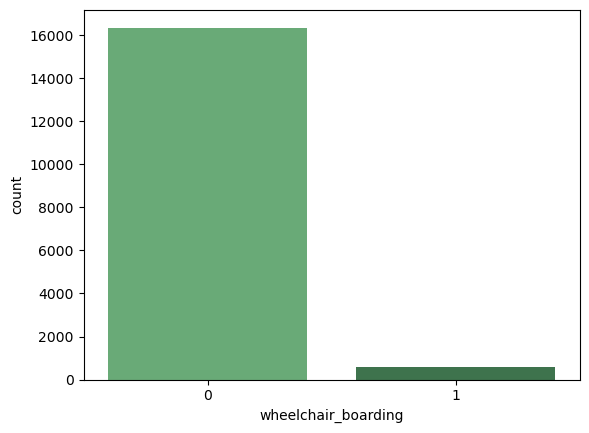

In [170]:
sns.countplot(x="wheelchair_boarding", data=df_stops, palette="Greens_d")
plt.show()

Not gonna lie, I did not expect it to be quite so bad? Poor effort HVV.

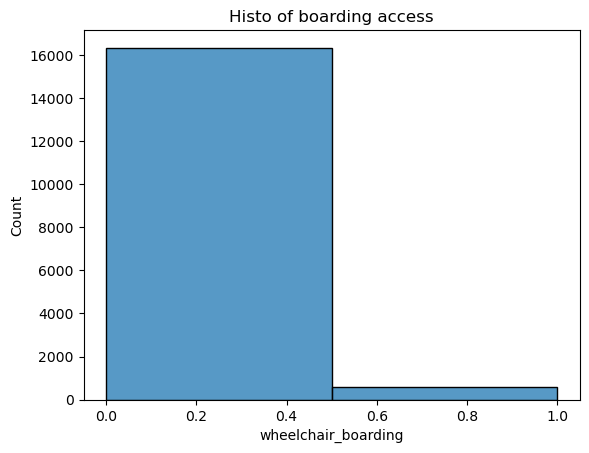

In [122]:
#this is pointless and you can ignore it, was just testing a histogram worked with the same data.
sns.histplot(df_stops["wheelchair_boarding"], binwidth = 0.5).set_title("Histo of boarding access")
plt.show()

# Geodata

Lets try to get something from df_stops re wheelchair access. I was given a pointer that geopandas is a good call for mapping.
I had a mini tutorial from a friend who works with geodata and says they use geopandas for most stuff and explained that you can make lat and long fields into one field and then map them.

Resources: 
https://geopandas.org/en/stable/docs/reference/api/geopandas.points_from_xy.html#geopandas.points_from_xy
The code below is basically taken directly from the second example on that page and works grand. 

In [21]:
gdf_stops = gpd.GeoDataFrame(df_stops, geometry=gpd.points_from_xy(df_stops.stop_lon, df_stops.stop_lat, crs="EPSG:4326")
)

In [22]:
gdf_stops.head(10)
#the geodataframe has the point where the stop is, so we can now visually map where has wheelchair access 

,stop_id,stop_code,stop_name,stop_desc,stop_lat,stop_lon,location_type,parent_station,wheelchair_boarding,platform_code,geometry
0,de:02000:11001::100001,NaN,HBF/Mönckebergstraße,NaN,53.551556,10.004337,0,NaN,0,NaN,POINT (10.00434 53.55156)
1,de:02000:10002:4:100009,NaN,Hauptbahnhof/ZOB,NaN,53.552235,10.011294,0,NaN,0,NaN,POINT (10.01129 53.55223)
2,de:02000:10003::100011,NaN,U S Berliner Tor (Beim Strohhause),NaN,53.553392,10.024147,0,NaN,0,NaN,POINT (10.02415 53.55339)
3,de:02000:10005::100012,NaN,Borgfelder Straße,NaN,53.554732,10.034456,0,NaN,0,NaN,POINT (10.03446 53.55473)
4,de:02000:10010::100018,NaN,Hübbesweg,NaN,53.554597,10.061131,0,NaN,0,NaN,POINT (10.06113 53.55460)
5,de:02000:10006:2:100021,NaN,U Burgstraße,NaN,53.555633,10.041434,0,NaN,0,NaN,POINT (10.04143 53.55563)
6,de:02000:10005::100024,NaN,Borgfelder Straße,NaN,53.554690,10.033112,0,NaN,0,NaN,POINT (10.03311 53.55469)
7,de:02000:10003::100025,NaN,U S Berliner Tor (Beim Strohhause),NaN,53.553508,10.023229,0,NaN,0,NaN,POINT (10.02323 53.55351)
8,de:02000:10002:3:100028,NaN,Hauptbahnhof/ZOB,NaN,53.552377,10.010346,0,NaN,0,NaN,POINT (10.01035 53.55238)
9,de:02000:10023::100034,NaN,Spaldingstraße,NaN,53.547144,10.010795,0,NaN,0,NaN,POINT (10.01080 53.54714)


Fig mapping the points and whether they are wheelchair accessible or not. 
Bit of an MVP as it's not interactive or easy to read, but it's a start!

Resources: 
https://www.youtube.com/watch?v=UO98lJQ3QGI
https://geopandas.org/en/stable/docs/reference/api/geopandas.points_from_xy.html#geopandas.points_from_xy
https://geopandas.org/en/stable/docs/user_guide/mapping.html


<AxesSubplot:>

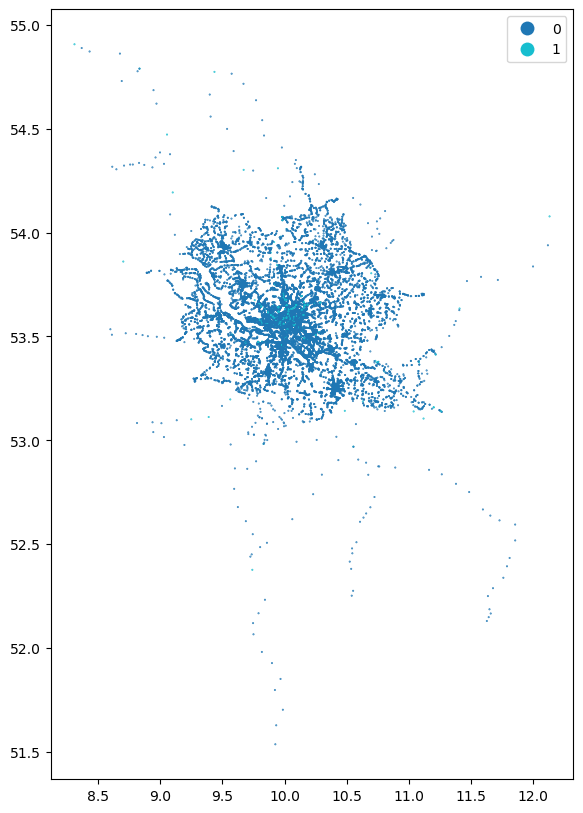

In [195]:
fig, ax = plt.subplots(1, 1)

fig.set_figheight(10) #  make a bit bigger
fig.set_figwidth(10)

gdf_stops.plot(column='wheelchair_boarding',markersize=0.2, categorical=True, ax=ax, legend=True)

Next moves:
1. Improve the map above, and see if there are more insights to accessibility that could be follow up on? 
2. Try the same analysis using 'trips' rather than 'stops' and check which routes are considered wheelchair accessible.
3. More unrelated to the specific work above but work out distances of journeys to work out electrification pros?